Majority Class Dominance:

    In an imbalanced dataset, the majority class significantly outnumbers the minority class.

    A model that simply predicts the majority class for all instances will achieve a high accuracy, even if it performs poorly for the minority class.

Underrepresentation of Minority Class:

    The minority class, being underrepresented, has fewer instances to learn from.
    This can lead to a model that is biased towards the majority class and struggles to accurately classify instances from the minority class.

Misleading Evaluation:

    A high accuracy score can mask the model's inability to effectively classify instances from the minority class.
    This can lead to false confidence in the model's performance and potentially harmful consequences, especially in domains where the minority class is critical (e.g., medical diagnosis, fraud detection).

# Cost Sensitive Learning

In [1]:
from sklearn.datasets import make_classification
import pandas as pd

# Create imbalanced dataset
X, y = make_classification(n_samples=10000,   # Total number of samples
                           n_features=10,    # Number of features
                           n_informative=5,  # Number of informative features
                           n_redundant=2,    # Number of redundant features
                           n_clusters_per_class=1,
                           weights=[0.99],   # Class imbalance: 95% of one class, 5% of the other
                           flip_y=0,         # No label noise
                           random_state=42)  # For reproducibility

# Convert to a pandas DataFrame
df = pd.DataFrame(X)
df['target'] = y

In [2]:
df[0]

0      -1.246494
1       2.087027
2       0.642503
3       3.658706
4       1.280821
          ...   
9995    2.533240
9996    0.148193
9997   -0.508591
9998   -1.162912
9999    2.814108
Name: 0, Length: 10000, dtype: float64

In [3]:
df[1]

0       2.516345
1       0.848137
2       2.582854
3      -0.277111
4       1.363026
          ...   
9995    1.636570
9996   -0.117300
9997    1.998669
9998    2.153047
9999    2.739341
Name: 1, Length: 10000, dtype: float64

In [4]:
df['target'].value_counts()

target
0    9900
1     100
Name: count, dtype: int64

In [5]:
import matplotlib.pyplot as plt

In [6]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Create a scatter plot for feature_0 and feature_1, with 0 as green and 1 as red
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x='feature_0', y='feature_1', hue='target', data=df, 
#                 palette={0: 'green', 1: 'red'}, alpha=0.7)

# # Add labels and title
# plt.title('Scatter Plot of Feature_0 vs Feature_1 by Target Class', fontsize=14)
# plt.xlabel('Feature 0')
# plt.ylabel('Feature 1')

# # Show plot
# plt.show()

In [7]:
pd.DataFrame(X)[0]

0      -1.246494
1       2.087027
2       0.642503
3       3.658706
4       1.280821
          ...   
9995    2.533240
9996    0.148193
9997   -0.508591
9998   -1.162912
9999    2.814108
Name: 0, Length: 10000, dtype: float64

In [8]:
pd.DataFrame(X)[1]

0       2.516345
1       0.848137
2       2.582854
3      -0.277111
4       1.363026
          ...   
9995    1.636570
9996   -0.117300
9997    1.998669
9998    2.153047
9999    2.739341
Name: 1, Length: 10000, dtype: float64

In [9]:
df['target']

0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: target, Length: 10000, dtype: int64

In [10]:
from collections import Counter
Counter(y)

Counter({0: 9900, 1: 100})

<AxesSubplot: xlabel='0', ylabel='1'>

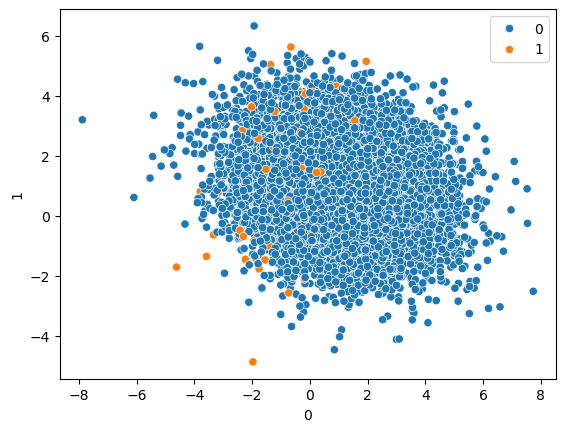

In [12]:
import seaborn as sns
sns.scatterplot(x=df[0],y= df[1], hue=y, data=df)

# Split the into train test split

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter Tuning

### Here we assiging the weight to out class 

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
lr = LogisticRegression()

In [16]:
penalty = ['l1', 'l2', 'elasticnet']
c_values = [100, 10, 1.0, 0.1, 0.01]
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
class_weight = [{0:w, 1:y} for w in [1, 10, 50, 100] for y in [1, 10, 50, 100]]

In [17]:
params = dict(penalty=penalty, C=c_values,solver=solver, class_weight=class_weight)

In [18]:
params

{'penalty': ['l1', 'l2', 'elasticnet'],
 'C': [100, 10, 1.0, 0.1, 0.01],
 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
 'class_weight': [{0: 1, 1: 1},
  {0: 1, 1: 10},
  {0: 1, 1: 50},
  {0: 1, 1: 100},
  {0: 10, 1: 1},
  {0: 10, 1: 10},
  {0: 10, 1: 50},
  {0: 10, 1: 100},
  {0: 50, 1: 1},
  {0: 50, 1: 10},
  {0: 50, 1: 50},
  {0: 50, 1: 100},
  {0: 100, 1: 1},
  {0: 100, 1: 10},
  {0: 100, 1: 50},
  {0: 100, 1: 100}]}

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold()
grid = GridSearchCV(lr, param_grid=params, cv=cv, scoring='accuracy')

In [ ]:
grid.fit(X_train, y_train)

/usr/lib/python3/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr

In [1]:
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split

# Generate imbalanced dataset
n_samples_1 = 25  # Number of samples in class 1
n_samples_2 = 375  # Number of samples in class 2
centers = [(0, 0), (2, 2)]  # Centers of each cluster
cluster_std = [1.5, 1.5]  # Standard deviation of each cluster

X, y = make_blobs(n_samples=[n_samples_1, n_samples_2],
                  centers=centers,
                  cluster_std=cluster_std,
                  random_state=0)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

def custom_loss(preds, dtrain):
    labels = dtrain.get_label()
    preds = 1.0 / (1.0 + np.exp(-preds))  # Convert to probability

    # Define penalties
    false_positive_penalty = 10
    false_negative_penalty = 1.0

    grad = (preds - labels) * ((labels == 1) * false_negative_penalty + (labels == 0) * false_positive_penalty)
    hess = preds * (1 - preds) * ((labels == 1) * false_negative_penalty + (labels == 0) * false_positive_penalty)
    return grad, hess

# Convert to DMatrix object
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set up parameters
params = {
    'max_depth': 3,
    'eta': 0.1,
    'silent': 1,
}

# Train the model
bst = xgb.train(params, dtrain, num_boost_round=10, obj=custom_loss)

# Predict test set
y_pred = np.where(bst.predict(dtest) > 0.5, 1, 0)
y_proba = bst.predict(dtest)  # Probability predictions

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print ROC AUC Score
auc_score = roc_auc_score(y_test, y_proba)
print("ROC AUC Score:", auc_score)

# Plotting ROC AUC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

def plot_decision_boundaries(X, y, model):
    plot_step = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    Z = model.predict(xgb.DMatrix(np.c_[xx.ravel(), yy.ravel()]))
    Z = np.where(Z > 0.5, 1, 0).reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', s=20)
    plt.title("Decision Boundary")
    plt.show()

# Plot decision boundary
plot_decision_boundaries(X, y, bst)


ModuleNotFoundError: No module named 'xgboost'